In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cpu'

In [4]:
# 前処理
transform = transforms.Compose([
    # 画像をTensorに変換してくれる
    # チャネルラストをチャネルファーストに
    # 0〜255の整数値を0.0〜1.0の浮動少数点に変換してくれる
    transforms.ToTensor()                              
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
num_batches = 100

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [7]:
train_iter = iter(train_dataloader)

In [8]:
train_iter

In [9]:
# 100個だけミニバッチからデータをロードする
imgs, labels = train_iter.next()

In [10]:
# 100個のデータ, グレースケール, 28px, 28px
imgs.size()

torch.Size([100, 1, 28, 28])

In [11]:
labels

tensor([5, 9, 4, 4, 3, 0, 4, 2, 6, 8, 1, 8, 0, 1, 0, 7, 9, 0, 6, 7, 4, 8, 4, 3,
        6, 3, 2, 9, 0, 3, 8, 7, 9, 1, 0, 8, 6, 0, 2, 1, 0, 5, 6, 2, 7, 9, 3, 4,
        5, 3, 0, 5, 7, 1, 0, 9, 7, 0, 9, 6, 7, 0, 1, 4, 9, 2, 7, 0, 9, 0, 2, 9,
        5, 8, 5, 3, 1, 2, 5, 5, 0, 3, 5, 6, 3, 2, 9, 0, 7, 7, 4, 5, 9, 1, 6, 9,
        0, 9, 7, 8])

In [12]:
img = imgs[0]

In [13]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
# 画像データを表示するために、チャネルファーストのデータをチャネルラストに変換する
img_permute = img.permute(1, 2, 0)

In [15]:
img_permute

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [

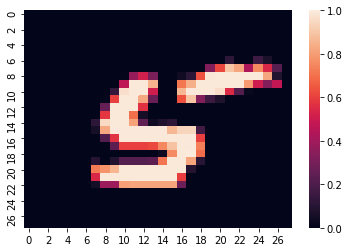

In [16]:
# tensorから2次元のarrayに変換する
sns.heatmap(img_permute.numpy()[:, :, 0])

In [17]:
labels[0]

tensor(5)

In [18]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            # 第1引数：input
            # 第2引数：output
            nn.Linear(28 * 28, 400),
            # メモリを節約出来る
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [19]:
model = MLP()

In [20]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        # dim=1 => 0-9の分類方向のMax値を返す
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    # 600回分で割る
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.3144182890901963, acc: 0.9040172100067139
epoch: 1, loss: 0.10678012145062288, acc: 0.9672999978065491
epoch: 2, loss: 0.06977350709688229, acc: 0.978699266910553
epoch: 3, loss: 0.05080254869457955, acc: 0.9838324785232544
epoch: 4, loss: 0.03807236930190508, acc: 0.9884151220321655
epoch: 5, loss: 0.030108206117680916, acc: 0.9902483224868774
epoch: 6, loss: 0.02514307263501299, acc: 0.9920487403869629
epoch: 7, loss: 0.021965318746709574, acc: 0.99261474609375
epoch: 8, loss: 0.017465066731674597, acc: 0.9945650100708008
epoch: 9, loss: 0.01654982843004594, acc: 0.9944486618041992
epoch: 10, loss: 0.01726974661234029, acc: 0.9946150779724121
epoch: 11, loss: 0.012983597406328045, acc: 0.9957318902015686
epoch: 12, loss: 0.010266869831981846, acc: 0.9965323805809021
epoch: 13, loss: 0.014592967388795538, acc: 0.9951822757720947
epoch: 14, loss: 0.00960112084202592, acc: 0.9969321489334106


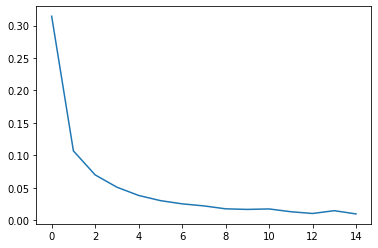

In [23]:
plt.plot(losses)

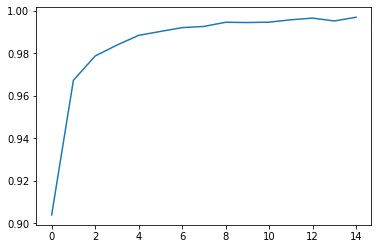

In [24]:
plt.plot(accs)

In [25]:
train_iter = iter(train_dataloader)

In [26]:
imgs, labels = train_iter.next()

In [27]:
labels

tensor([8, 4, 3, 2, 9, 7, 7, 6, 5, 8, 6, 4, 6, 5, 9, 6, 6, 7, 7, 6, 9, 3, 1, 7,
        4, 0, 6, 8, 6, 7, 8, 9, 3, 6, 5, 9, 8, 6, 0, 4, 2, 1, 6, 8, 0, 8, 1, 0,
        7, 8, 4, 2, 9, 3, 6, 1, 8, 1, 8, 4, 7, 2, 9, 0, 6, 8, 9, 9, 5, 7, 5, 8,
        2, 5, 9, 0, 3, 7, 0, 7, 8, 5, 1, 1, 8, 4, 4, 0, 6, 3, 1, 0, 7, 4, 5, 0,
        3, 0, 9, 8])

In [28]:
imgs_gpu = imgs.view(100, -1).to(device)
output= model(imgs_gpu)

In [29]:
pred = torch.argmax(output, dim=1)

In [30]:
pred

tensor([8, 4, 3, 2, 9, 7, 7, 6, 5, 8, 6, 4, 6, 5, 9, 6, 6, 7, 7, 6, 9, 3, 1, 7,
        4, 0, 6, 8, 6, 7, 8, 9, 3, 6, 5, 9, 8, 6, 0, 4, 2, 1, 6, 8, 0, 8, 1, 0,
        7, 8, 4, 2, 9, 3, 6, 1, 8, 1, 8, 4, 7, 2, 9, 0, 6, 8, 9, 9, 5, 7, 5, 8,
        2, 5, 9, 0, 3, 7, 0, 7, 8, 5, 1, 1, 8, 4, 4, 0, 6, 3, 1, 0, 7, 4, 5, 0,
        3, 0, 9, 8])

In [31]:
# 重み、バイアスを抜き出す
params = model.state_dict()

In [32]:
# 抜き出した重み、バイアスをprmファイルに保存する。
torch.save(params, "model.prm")

In [33]:
!ls

data  model.prm  sample_data


In [34]:
param_load = torch.load("model.prm")

In [35]:
model.load_state_dict(param_load)

<All keys matched successfully>

In [36]:
num_epochs = 10
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        # dim=1 => 0-9の分類方向のMax値を返す
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    # 600回分で割る
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.01329927400600809, acc: 0.9961652755737305
epoch: 1, loss: 0.007679990973741345, acc: 0.9977990984916687
epoch: 2, loss: 0.008979191901667037, acc: 0.9971490502357483
epoch: 3, loss: 0.009341739794928496, acc: 0.9969989061355591
epoch: 4, loss: 0.007988007768026363, acc: 0.9976492524147034
epoch: 5, loss: 0.008332742984907781, acc: 0.9973315596580505
epoch: 6, loss: 0.006474268563735374, acc: 0.9979825615882874
epoch: 7, loss: 0.008563532610366261, acc: 0.9973323345184326
epoch: 8, loss: 0.005235775806599652, acc: 0.998366117477417
epoch: 9, loss: 0.008188722305379391, acc: 0.9978159666061401
